In [1]:
using PyPlot

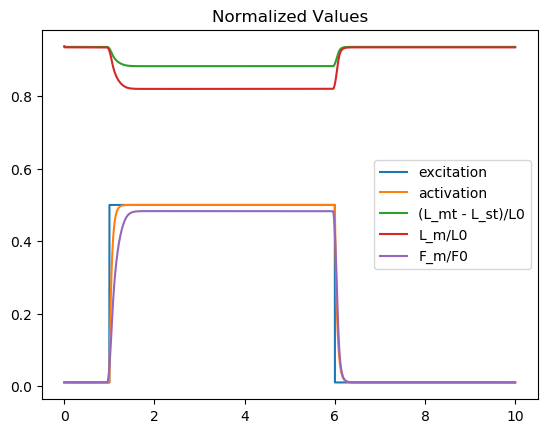

PyObject <matplotlib.text.Text object at 0x7fde507ab2e8>

In [25]:
#parameters
centis = 10.0^-2
TAU = 0.05 
BETA = 1
L0 = 8*centis # optimal length of muscle
F0 = 18
V_MAX = 5*L0
L_ST = 4*L0 # length of slack tendon
MAX_STRAIN = 0.0325
K_SP = 20/centis
K_T = F0/(MAX_STRAIN*L_ST)
L_MT = 39.5*centis
V_MT = 0
L_LOAD = 5*centis
L_TOT = 44.5*centis

include("Musclesim.jl")
include("jules/jules.jl")
ms = MuscleSim
js = Jules

start = 0
fin = 10
dt = 0.001
time = collect(start:dt:fin)

(model, external_model) = ms.CreateModel(
    start_time = start,
    end_time = fin,
    dt = dt,
    tau = TAU,
    beta = BETA,
    V_max = V_MAX,
    F_max = F0,
    L_optimal = L0,
    L_mt_initial = L_MT,
    K_t = K_T,
    K_sp = K_SP,
    L_st = L_ST,
    L_total = L_TOT,
    L_load = L_LOAD,
    activ_lower_bound = 0.01,
    activ_upper_bound = 1.0,
    excitation_func=ms.excite)

output = ms.simulateExternal(model, external_model)
#plot(model.time, model.excitation)
#plot(model.time, model.activation)

index = 1:length(output.time) -1
function plotOutput(output, index)
    plot(output.time[index], output.excitation[index], label="excitation")
    plot(output.time[index], output.activation[index], label="activation")
    plot(output.time[index], output.L_mt[index], label="L_mt")
    plot(output.time[index], output.L_m[index], label="L_m")
    plot(output.time[index], output.L_t[index], label="L_t")
    plot(output.time[index], output.V_mt[index], label="V_mt")
    plot(output.time[index], output.F_m[index], label="F_m")
    legend()
end

cons = a -> js.constrain(a, -1.23, 1.23)

function plotOutputNormalized(output, index)
    plot(output.time[index], output.excitation[index], label="excitation")
    plot(output.time[index], output.activation[index], label="activation")
    plot(output.time[index], map(cons, (output.L_mt[index] - model.L_st)/model.L_optimal), label="(L_mt - L_st)/L0")
    plot(output.time[index], map(cons, output.L_m[index]/model.L_optimal), label="L_m/L0")
    #plot(output.time[index], output.V_mt[index], label="V_mt")
    #plot(output.time[index], output.V_m[index]/model.V_max, label="V_m")
    plot(output.time[index], map(cons, output.F_m[index]/model.F_max), label="F_m/F0")
    legend()
    title("Normalized Values")
end

function plotOutputNormalizedSmoothed(output, index, points)
    
    plot(output.time[index], output.excitation[index], label="excitation")
    plot(output.time[index], output.activation[index], label="activation")
    plot(output.time[index], js.smooth(map(cons, (output.L_mt[index] - model.L_st)/model.L_optimal), points), label="(L_mt - L_st)/L0")
    plot(output.time[index], js.smooth(map(cons, output.L_m[index]/model.L_optimal), points), label="L_m/L0")
    #plot(output.time[index], output.V_mt[index], label="V_mt")
    #plot(output.time[index], output.V_m[index]/model.V_max, label="V_m")
    plot(output.time[index], js.smooth(map(cons, output.F_m[index]/model.F_max), points), label="F_m/F0")
    legend()
    title("Normalized Values")
end

index = 1:length(output.time) -1
plotOutputNormalizedSmoothed(output, index, 101)
#plotOutputNormalized(output, index)
#plotOutput(output, index)

#output.activation[index]
#Kplot(model.time, model.activation)
#plot(time, b[1:length(time)])



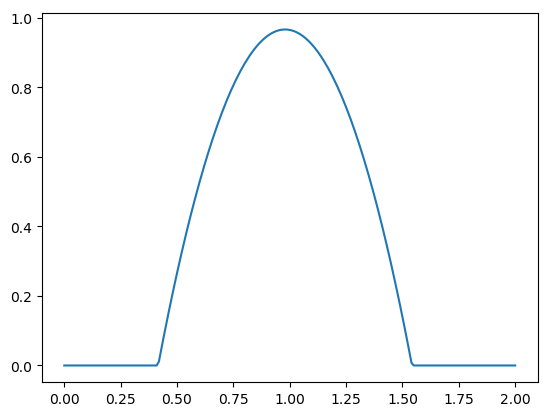

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f397c31d860>

In [199]:
#plot(output.time, output.activation_dot)
#plot(model.time, model.K_t)
#add slack length of the load
#integrate until F_m settles for initial value
#let integrations go for a little while to allow errors to settle
#calculate a(t) every iteration

array = collect(-0:0.01:2)
out = map(ms.norm_length_tension, array)
plot(array,  out)

#js.interp(out, array, 0.0)
#plot(array,out)

$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
LT\left(\frac{L}{L_0}\right) &= -3.0508\cdot \left(\frac{L}{L_0}\right)^2 + 5.9758\cdot \left(\frac{L}{L_0}\right) - 1.9597, 0.42 \le \frac{L}{L_0}\le1.54 \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}} \\
\tilde{V}_m &= 0.995242\cdot e^{13.8817(F\tilde{V}-1.39214)} - 0.996815\cdot e^{-3.91442 F\tilde{V}} \\
\dot{F}_t &= K_t (V_{mt} - V_m) \\
V_m &= V_{max} \cdot FV^{-1} \left(\frac{F_m}{F_0 \cdot a \cdot LT(\tilde{L}_m)}\right)
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.
# Should I clamp Force to F0?

# Part A

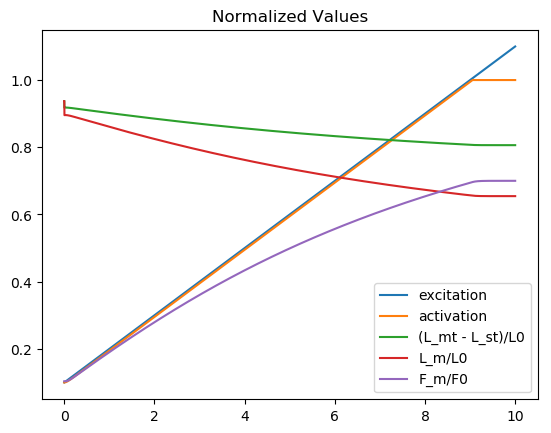

In [84]:
ramp = t -> t/10 + 0.1

model.excitation_func = ramp
external_model.K_load = 20/centis
model.tau = TAU
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1 
plotOutputNormalized(output, index) # really slow so no viscous effects
outputramp = output;

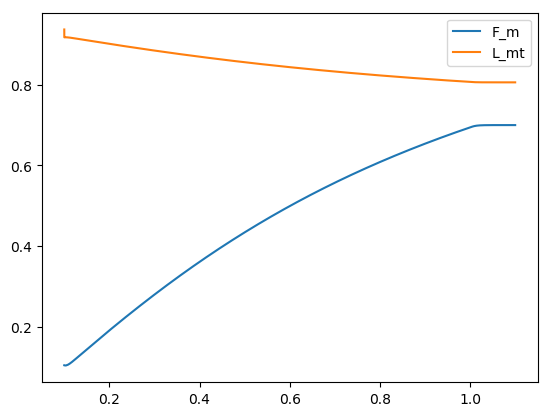

PyObject <matplotlib.legend.Legend object at 0x7fde4a1862e8>

In [85]:
function plotExcitation(output)
    plot(output.excitation[index], output.F_m[index]/model.F_max, label="F_m")
    plot(output.excitation[index], (output.L_mt[index] - model.L_st)/L0, label="L_mt")
    legend()
end

plotExcitation(output)

search: const isconst consume condskeel contains countlines count_ones



`const` is used to declare global variables which are also constant. In almost all code (and particularly performance sensitive code) global variables should be declared constant in this way.

```
const x = 5
```

Note that "constant-ness" is not enforced inside containers, so if `x` is an array or dictionary (for example) you can still add and remove elements.

Technically, you can even redefine `const` variables, although this will generate a warning from the compiler. The only strict requirement is that the *type* of the variable does not change, which is why `const` variables are much faster than regular globals.


# Part B

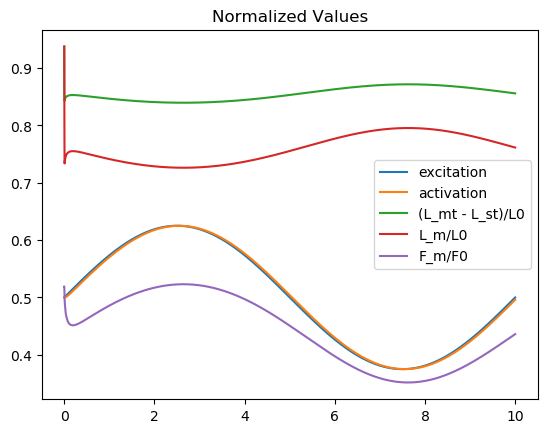

PyObject <matplotlib.text.Text object at 0x7fde4a30ca20>

In [87]:

model.excitation_func = osc01
external_model.K_load = 20/centis
model.tau = TAU
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
#plotOutputNormalized(output, index)
plotOutputNormalizedSmoothed(output, index, 11)

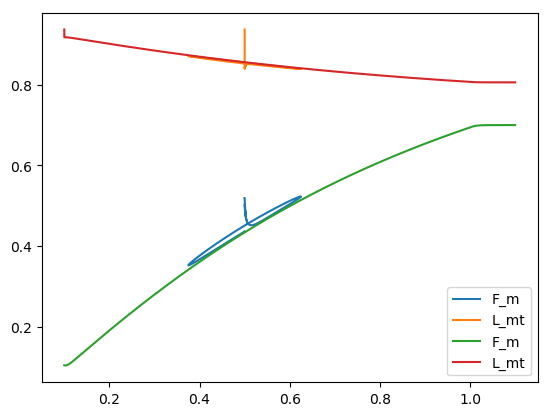

PyObject <matplotlib.legend.Legend object at 0x7fde49f88320>

In [89]:
plotExcitation(output)
plotExcitation(outputramp)

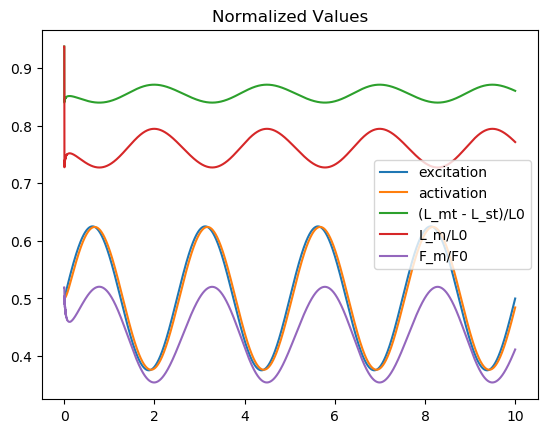

PyObject <matplotlib.text.Text object at 0x7fde49efba58>

In [90]:

model.excitation_func = osc04
external_model.K_load = 20/centis
model.tau = TAU
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)


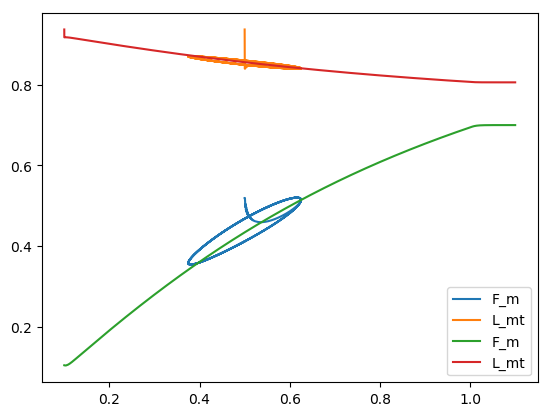

PyObject <matplotlib.legend.Legend object at 0x7fde49d94358>

In [91]:
plotExcitation(output)
plotExcitation(outputramp)

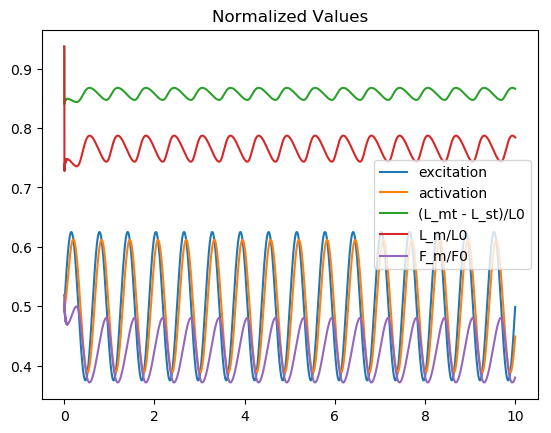

PyObject <matplotlib.text.Text object at 0x7fde49d0bc88>

In [92]:

model.excitation_func = osc16
external_model.K_load = 20/centis
model.tau = TAU
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)


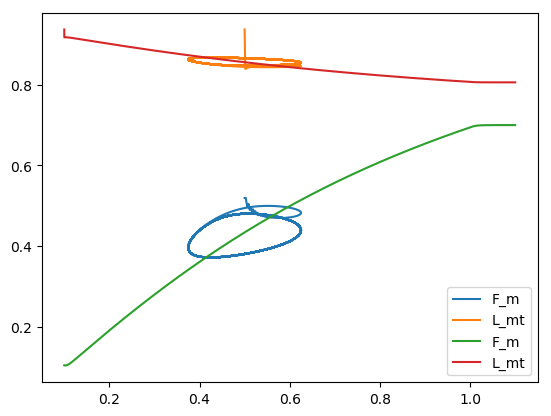

PyObject <matplotlib.legend.Legend object at 0x7fde49c25710>

In [93]:
plotExcitation(output)
plotExcitation(outputramp)

# Part C, Change K_load

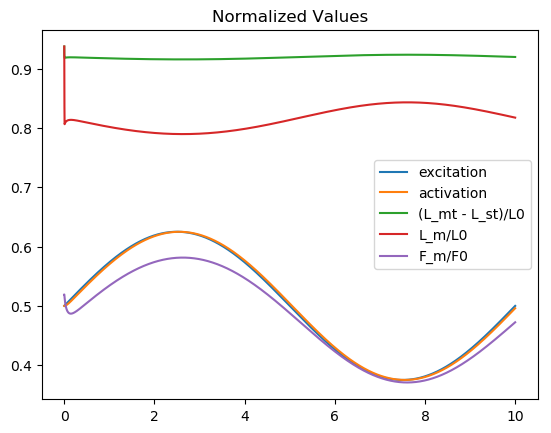

PyObject <matplotlib.text.Text object at 0x7fde4b62e5c0>

In [55]:
model.excitation_func = osc01
external_model.K_load = 100/centis
model.tau = TAU
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
#plotOutputNormalized(output, index)
plotOutputNormalizedSmoothed(output, index, 11)

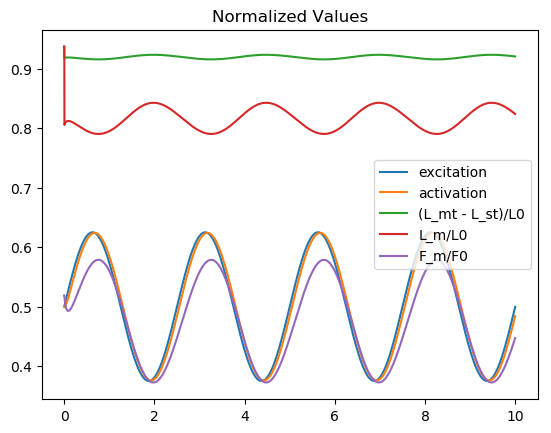

PyObject <matplotlib.text.Text object at 0x7fde4b4fb5c0>

In [56]:

model.excitation_func = osc04
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

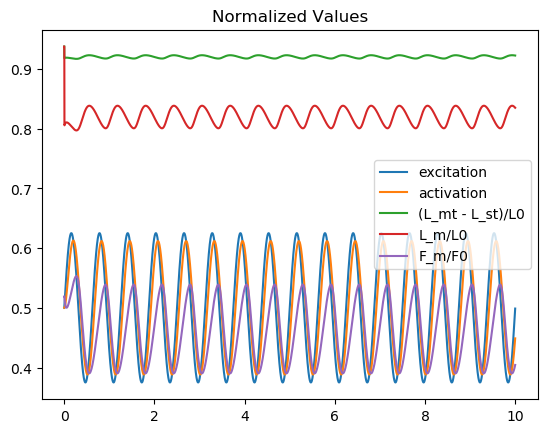

PyObject <matplotlib.text.Text object at 0x7fde4b4495c0>

In [57]:

model.excitation_func = osc16
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

# Part C, Change Tau to 1

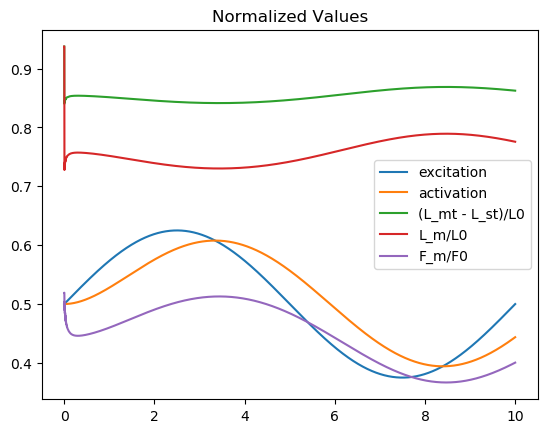

PyObject <matplotlib.text.Text object at 0x7fde50382898>

In [29]:
u0 = 0.5
ud = 0.125

oscillate = (f,t) -> u0 + ud*sin(2*pi*f*t)

osc01 = t -> oscillate(0.1, t)
osc04 = t -> oscillate(0.4, t)
osc16 = t -> oscillate(1.6, t)

model.excitation_func = osc01
model.tau = 1
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

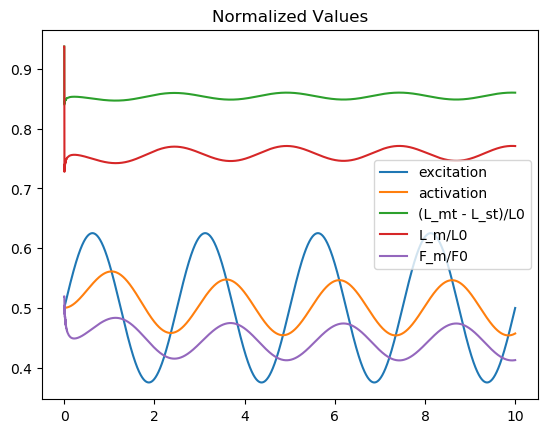

PyObject <matplotlib.text.Text object at 0x7fde502d08d0>

In [30]:
model.excitation_func = osc04
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

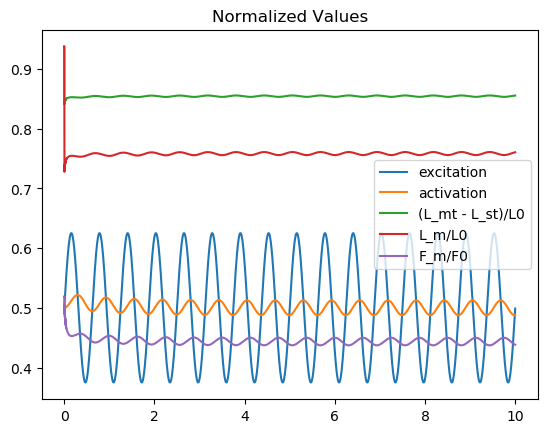

PyObject <matplotlib.text.Text object at 0x7fde5021e8d0>

In [31]:
model.excitation_func = osc16
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

# Proof of concept

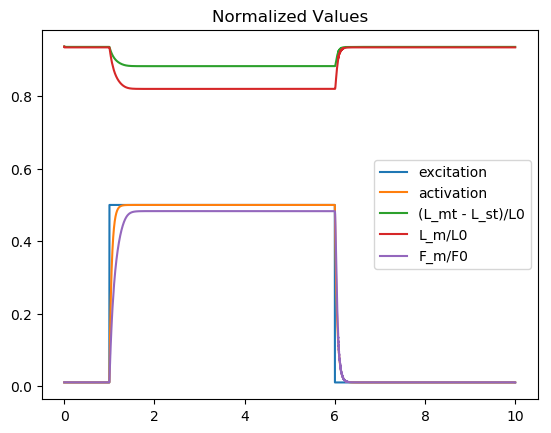

PyObject <matplotlib.text.Text object at 0x7fde506f3668>

In [26]:

model.F_max = 18
model.V_max = 5*L0
model.tau = TAU
model.excitation_func = ms.excite
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)

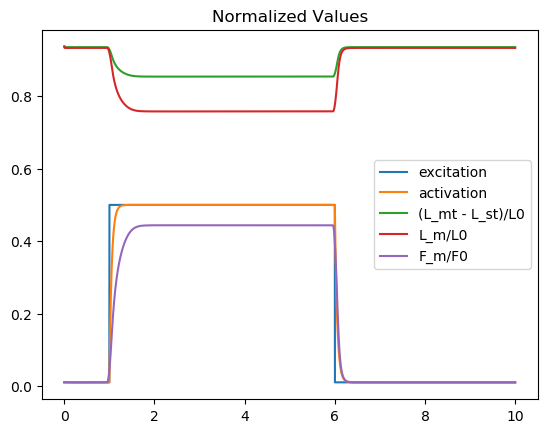

PyObject <matplotlib.text.Text object at 0x7fde5063bf60>

In [27]:

model.F_max = 30
model.V_max = 5*L0
external_model.K_load = 20/centis
model.tau = TAU
model.excitation_func = ms.excite
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalizedSmoothed(output, index, 101)

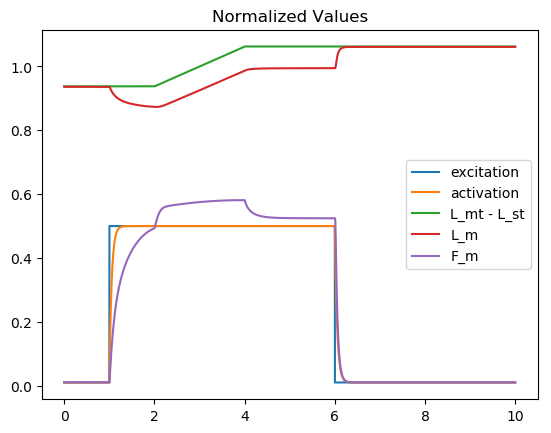

PyObject <matplotlib.text.Text object at 0x7f397579fe48>

In [284]:
model.F_max = F0
model.V_max = L0
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)


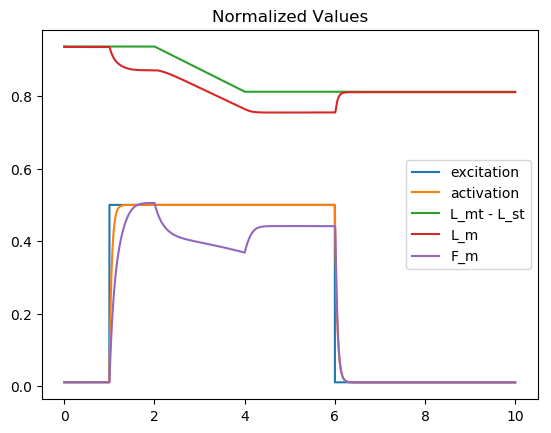

PyObject <matplotlib.text.Text object at 0x7f397947bd68>

In [241]:
model.F_max = F0
model.V_max = 2*L0
output = ms.simulateExternal(model, external_model)
index = 1:length(output.time)-1
plotOutputNormalized(output, index)